<a href="https://colab.research.google.com/github/naiilard/Simulasi-Model-GSTAR-2-1-1-/blob/main/GSTAR(2%3B1%2C1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

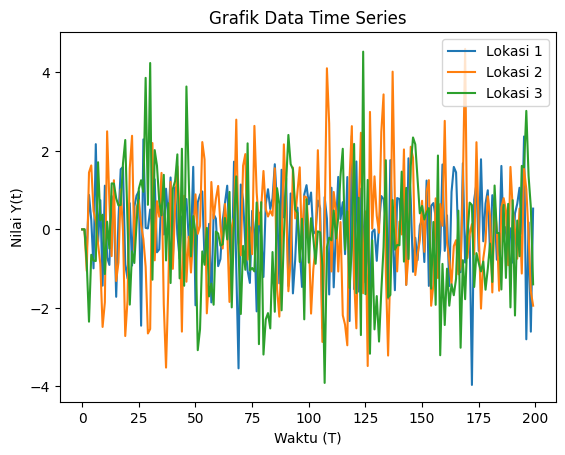

Rata-rata MSE untuk setiap T
[0.12583962 0.11423443 0.11032963 0.09581859 0.08797056 0.08568155
 0.08325702 0.07669597 0.07194444 0.06519866 0.06577475 0.06319679
 0.06024925 0.05759907 0.05594807 0.05288984 0.04832709 0.0482227
 0.04681317 0.04555081 0.04128487 0.04188446 0.03725871 0.03836405
 0.03808703 0.03731416 0.03655232 0.03575388 0.03394401 0.03413464
 0.03165674 0.03212212 0.03179703 0.03078984 0.02992887 0.02874316
 0.02844556 0.02759543 0.02752003 0.02616833 0.0261467  0.02586019
 0.02495705 0.02428982 0.02401068 0.02360566 0.0240256  0.02246571
 0.02264478 0.02307376 0.02205547 0.02200624 0.02139829 0.0215106
 0.01990192 0.02032004 0.01964649 0.01998227 0.01895315 0.02002902
 0.01868309 0.01846413 0.0188433  0.01814317 0.01686651 0.01738468
 0.01750446 0.01701696 0.01637527 0.01681597 0.01614239 0.01634273
 0.01567694 0.01531311 0.015625   0.01526666 0.01492336 0.01542842
 0.01467691 0.01421485 0.01468397 0.01433727 0.01438354 0.01387788
 0.01400134 0.013924   0.01390226 0

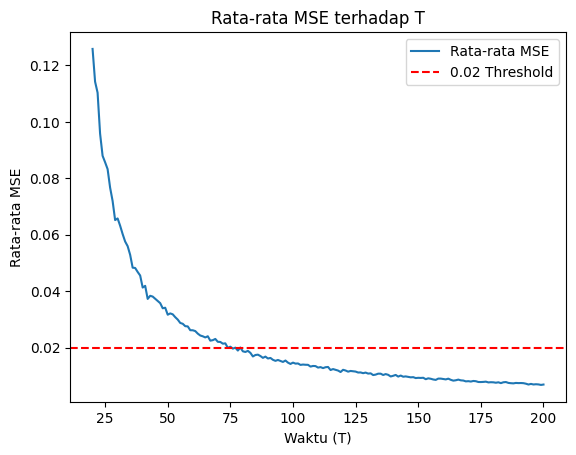

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
N = 3  # Banyak observasi lokasi
T = np.arange(20, 201)  # Banyak observasi waktu
iterasi = 500

# Bobot Matriks Parameter
w = 1 / (N - 1)
W1 = (1 - np.eye(N)) * w  # Bobot uniform
W2 = np.array([[0, 1, 0], [1, 0, 0], [1, 0, 0]])  # Bobot biner

# Parameter Awal Nilai Eigen < 0.2
phi10 = np.diag([-0.3375, 0.1114, 0.0698])
phi11 = np.diag([-0.3341, 0.4039, 0.4806])
phi12 = np.diag([-0.0335, -0.5080, 0.6372])
phi20 = np.diag([0.0173, -0.5654, 0.6956])
phi21 = np.diag([-0.1652, -1.2875, 0.4347])

# Menyimpan MSE untuk setiap T
mse_phi10_T = np.zeros((len(T), N))
mse_phi11_T = np.zeros((len(T), N))
mse_phi12_T = np.zeros((len(T), N))
mse_phi20_T = np.zeros((len(T), N))
mse_phi21_T = np.zeros((len(T), N))

# Iterasi untuk setiap T
for t_idx, t in enumerate(T):
    phi10_est = np.zeros((iterasi, N))
    phi11_est = np.zeros((iterasi, N))
    phi12_est = np.zeros((iterasi, N))
    phi20_est = np.zeros((iterasi, N))
    phi21_est = np.zeros((iterasi, N))

    for mc in range(iterasi):
        residu = np.random.randn(N, t)
        Y = np.zeros((N, t))

        for tt in range(2, t):
            Y[:, tt] = (phi10 + phi11 @ W1 + phi12 @ W2) @ Y[:, tt-1] + (phi20 + phi21 @ W1) @ Y[:, tt-2] + residu[:, tt]

        for i in range(N):
            X = np.column_stack([
                Y[i, 1:t-1],
                W1[i, :] @ Y[:, 1:t-1],
                W2[i, :] @ Y[:, 1:t-1],
                Y[i, 0:t-2],
                W1[i, :] @ Y[:, 0:t-2]
            ])
            Yawal = Y[i, 2:t]
            beta_est = np.linalg.lstsq(X, Yawal, rcond=None)[0]

            phi10_est[mc, i] = beta_est[0]
            phi11_est[mc, i] = beta_est[1]
            phi12_est[mc, i] = beta_est[2]
            phi20_est[mc, i] = beta_est[3]
            phi21_est[mc, i] = beta_est[4]

    mse_phi10_T[t_idx, :] = np.mean((phi10_est - np.diag(phi10)) ** 2, axis=0)
    mse_phi11_T[t_idx, :] = np.mean((phi11_est - np.diag(phi11)) ** 2, axis=0)
    mse_phi12_T[t_idx, :] = np.mean((phi12_est - np.diag(phi12)) ** 2, axis=0)
    mse_phi20_T[t_idx, :] = np.mean((phi20_est - np.diag(phi20)) ** 2, axis=0)
    mse_phi21_T[t_idx, :] = np.mean((phi21_est - np.diag(phi21)) ** 2, axis=0)

# Menampilkan grafik Y(t)
plt.figure()
for i in range(N):
    plt.plot(range(t), Y[i, :], label=f'Lokasi {i+1}')
plt.title('Grafik Data Time Series')
plt.xlabel('Waktu (T)')
plt.ylabel('Nilai Y(t)')
plt.legend()
plt.show()

# Menghitung rata-rata MSE untuk semua parameter
mean_mse_T = np.mean([mse_phi10_T, mse_phi11_T, mse_phi12_T, mse_phi20_T, mse_phi21_T], axis=0)
mean_mse_T = np.mean(mean_mse_T, axis=1)

# Menentukan T minimum ketika rata-rata MSE < 0.02
T_min_idx = np.where(mean_mse_T < 0.02)[0]
T_min = T[T_min_idx[0]] if T_min_idx.size > 0 else None

# Menampilkan hasil
print('Rata-rata MSE untuk setiap T')
print(mean_mse_T)
print(f'T minimum ketika MSE < 0.02: {T_min}')

# Plot MSE rata-rata terhadap T
plt.figure()
plt.plot(T, mean_mse_T, label='Rata-rata MSE')
plt.axhline(y=0.02, color='r', linestyle='--', label='0.02 Threshold')
plt.title('Rata-rata MSE terhadap T')
plt.xlabel('Waktu (T)')
plt.ylabel('Rata-rata MSE')
plt.legend()
plt.show()